### **Célula para a inicialização dos imports e modulos**

In [1]:
# Inicialização dos imports e caminho do pacote
import sys
import os
sys.path.append(os.path.abspath(".."))
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from nao_supervisionado.loading_images import loading_images
from nao_supervisionado.normalize import normalize
from nao_supervisionado.tsne_runner import tsne_runner
from nao_supervisionado.pca_runner import pca_runner
from nao_supervisionado.umap_runner import umap_runner
from nao_supervisionado.cluster_runner import cluster_runner

### **Célula para carregar e normalizar os dados**

In [2]:
# Carregar imagens do dataset
print("Carregando imagens...")
X, files, labels = loading_images("../data/RecFac", image_size=(128, 120))
print(f"Total de imagens carregadas: {len(files)}")

# Normalizar os dados
print("Normalizando dados...")
X_norm = normalize(X)


Carregando imagens...
Total de imagens carregadas: 640
Normalizando dados...


### **Célula de Visualização do t-SNE**

Executando t-SNE...


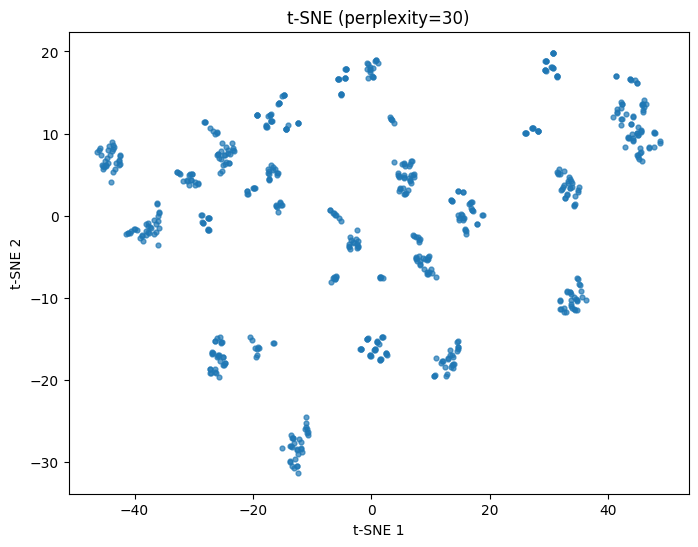

In [3]:
# Executar t-SNE
print("Executando t-SNE...")
X_tsne = tsne_runner(X_norm, perplexity=30)

### **Célula Visualização PCA 90%, 80% e 75% de variância**

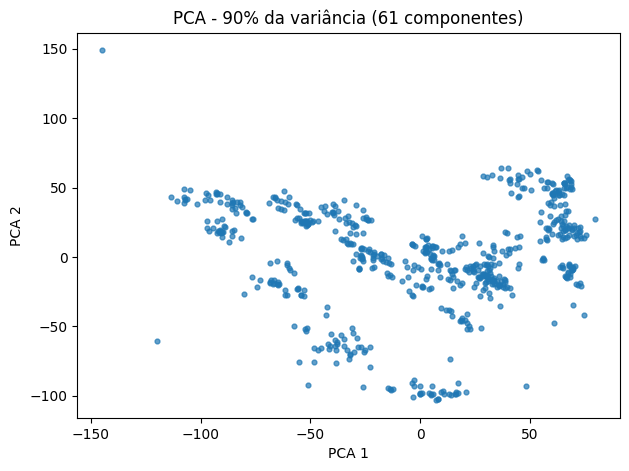

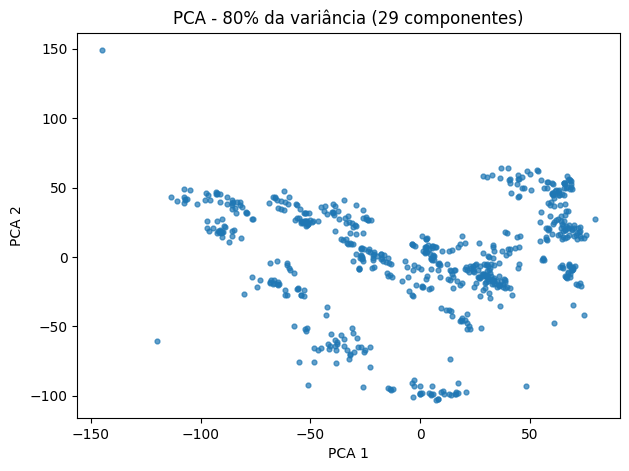

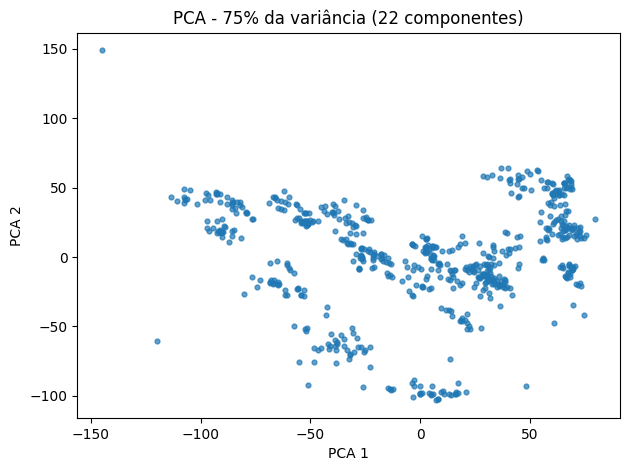

In [6]:
# Executar PCA para 90%, 80% e 75% da variância
pca_results = pca_runner(X_norm, variances=[0.90, 0.80, 0.75])

### **Célula visualização 2D e 3D do UMAP (dimensões 3, 15, 55, 101)**

/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


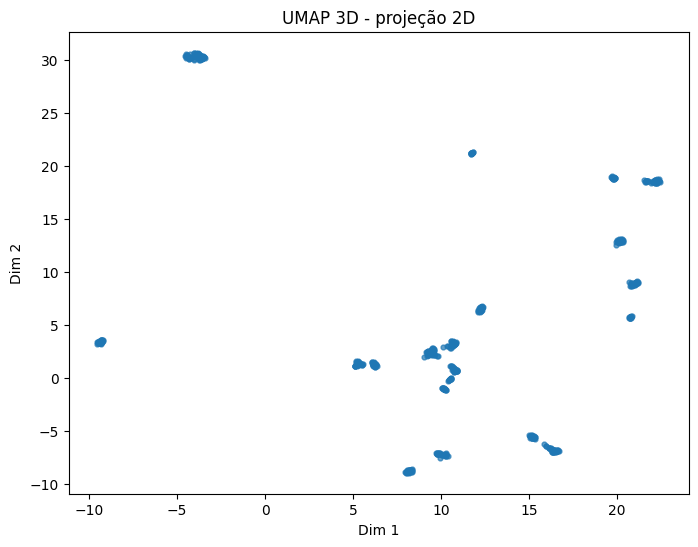

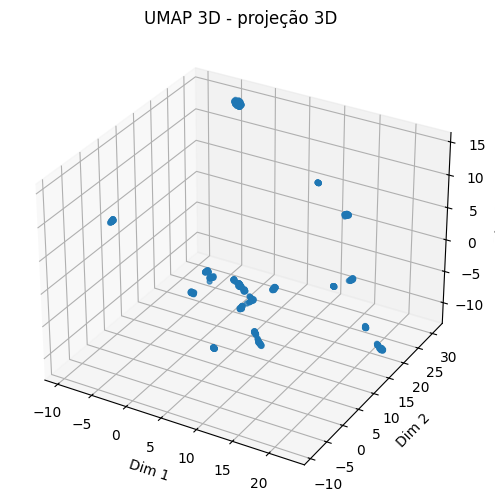

/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


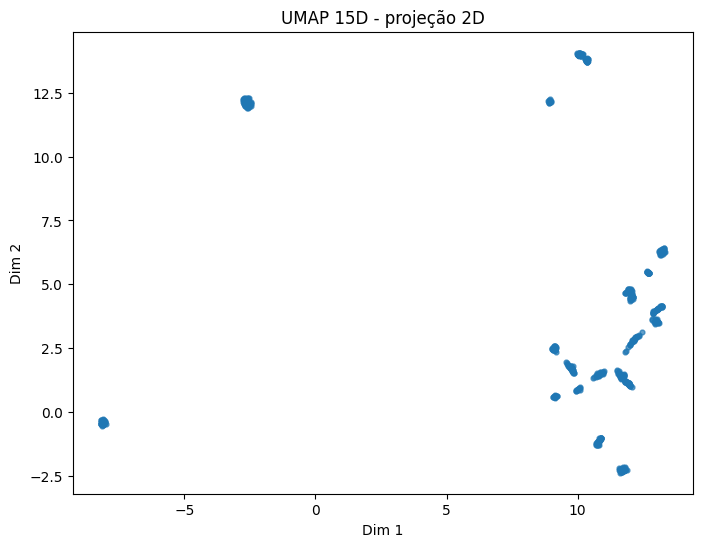

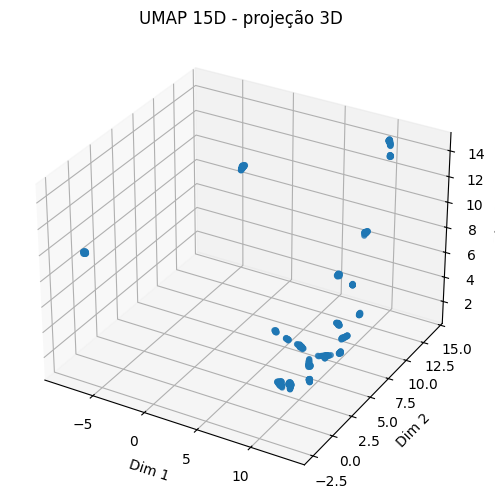

/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


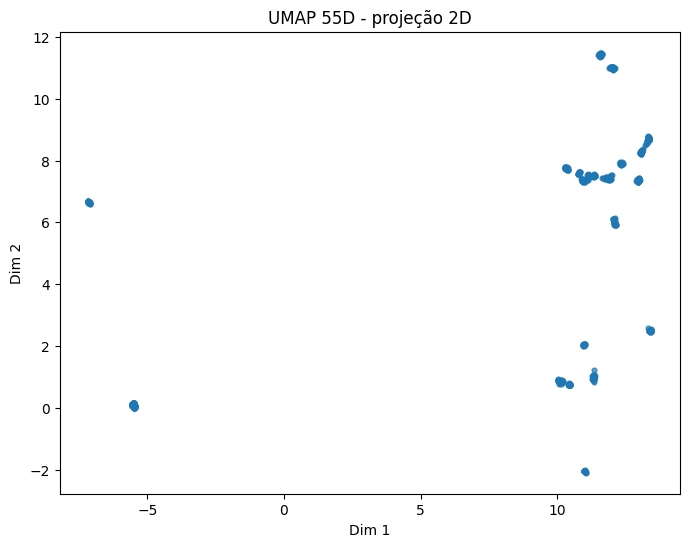

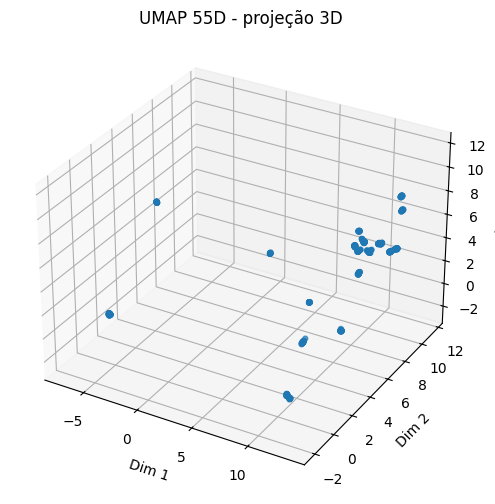

/home/pedro/projetos/ML-Project/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


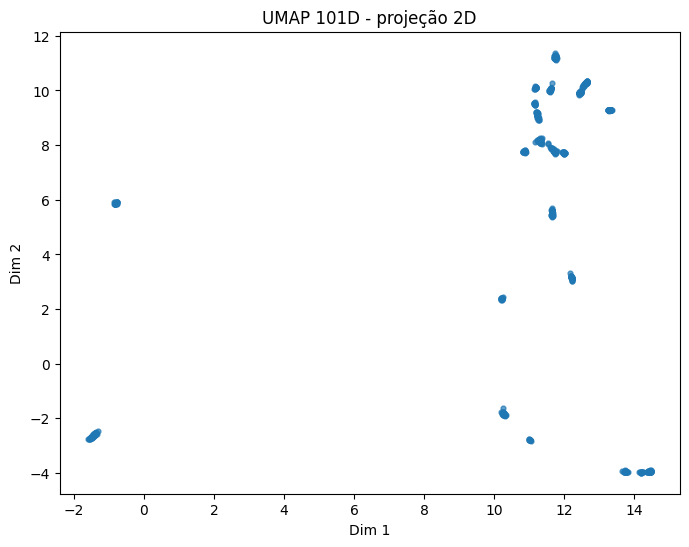

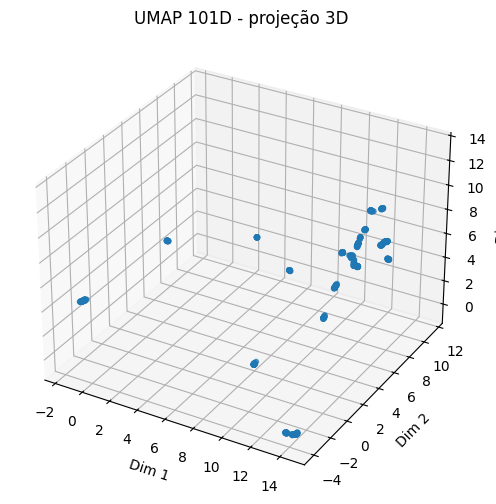

In [7]:
# Executar UMAP para dimensões 3, 15, 55 e 101
umap_results = umap_runner(X_norm, dims=[3, 15, 55, 101])

### **Célula de Clusterização com K-means**

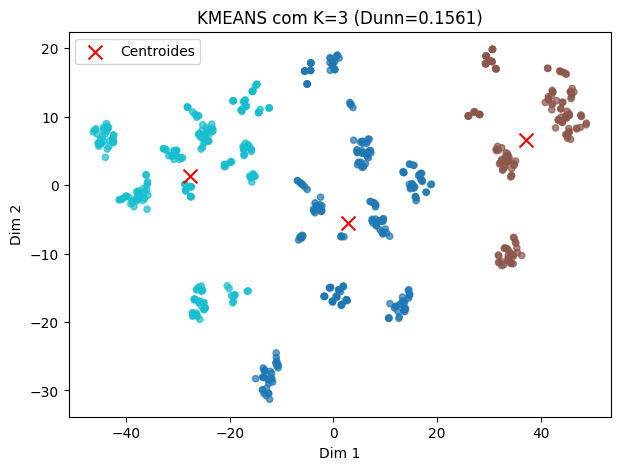

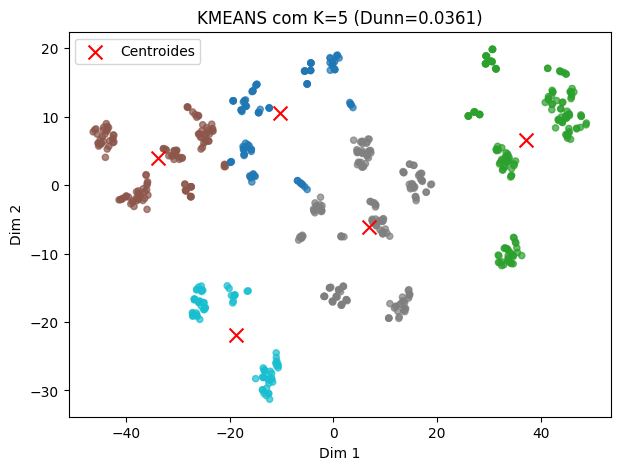

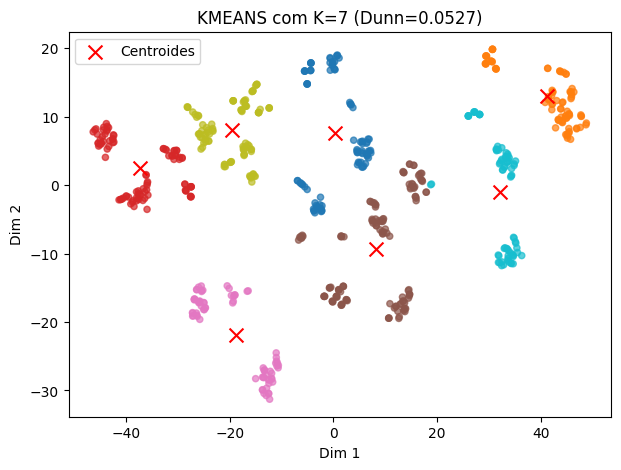

Resultados K-means (Dunn): {3: 0.15608044993236098, 5: 0.03606069105917359, 7: 0.05272609406172854}


In [ ]:
# Clusterização com K-means
k_values = [3, 5, 7]
kmeans_results = cluster_runner(X_tsne, k_values=k_values, method="kmeans", plot=True)

print("Resultados K-means (Dunn):", kmeans_results)


### **Célula de Clusterização com K-medoids**

/home/pedro/projetos/ML-Project/nao_supervisionado/cluster_runner.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


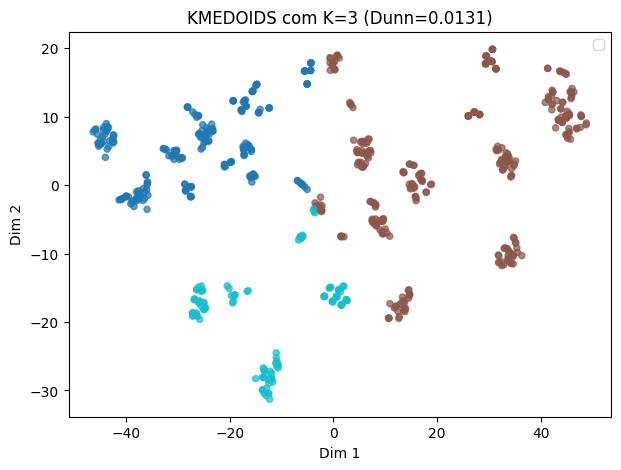

/home/pedro/projetos/ML-Project/nao_supervisionado/cluster_runner.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


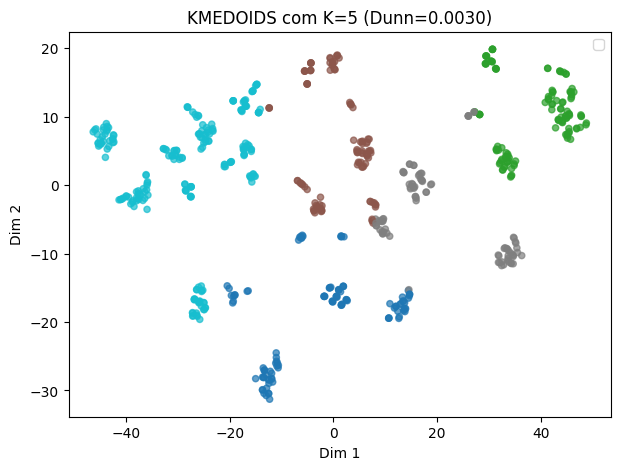

/home/pedro/projetos/ML-Project/nao_supervisionado/cluster_runner.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


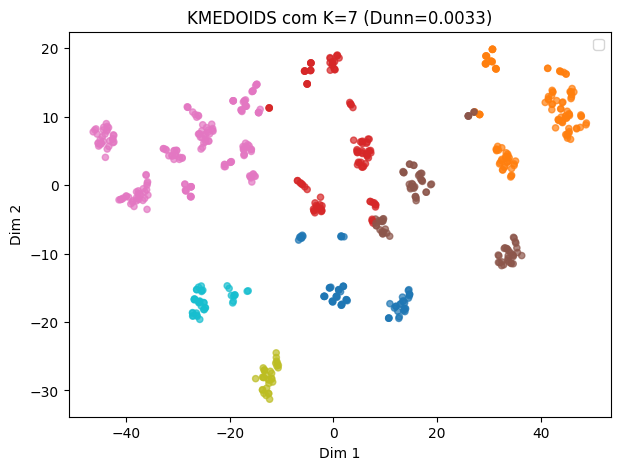

Resultados K-medoids (Dunn): {3: 0.013112439925528156, 5: 0.002963912988607878, 7: 0.0032991700898502407}


In [9]:
# Clusterização com K-medoids
kmedoids_results = cluster_runner(X_tsne, k_values=k_values, method="kmedoids", plot=True)

print("Resultados K-medoids (Dunn):", kmedoids_results)